In [ ]:
import io 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import files
uploaded=files.upload()
#comment

Saving dataset.csv to dataset.csv


In [ ]:

#import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd
#import os

In [ ]:
BASE_PATH = 'D:/'

In [ ]:
#Read the csv file into a Pandas dataframe
#datadf = pd.read_csv('D:/BK-Lap-Dilhara/dataset.csv',encoding = "ISO-8859-1")
#datadf
datadf = pd.read_csv(io.StringIO(uploaded['dataset.csv'].decode('ISO-8859-1')))
datadf.head()

,Humidity,Temperature,Light Intensity Level,CO Level
0,95.6,31.1,236.0,1.63
1,95.6,31.1,236.0,1.67
2,95.6,31.0,237.0,1.67
3,95.7,31.0,237.0,1.70
4,95.8,31.0,236.0,1.69


In [ ]:
#remove rows with Null/NaN values
print("Before removing null rows: ", len(datadf))
data_df = datadf.dropna() 
print("After removing null rows: ", len(data_df))

Before removing null rows:  1404
After removing null rows:  1403


In [ ]:
Time = []
Humidity = []
LightIntensityLevel = []
COLevel = []
Temperature = []

for i in range(len(data_df)):
    Time.append(data_df.index.values[i]) 
    Humidity.append(data_df['Humidity'].values[i]) 
    LightIntensityLevel.append(data_df['Light Intensity Level'].values[i]) 
    Temperature.append(data_df['Temperature'].values[i])
    COLevel.append(data_df['CO Level'].values[i])     

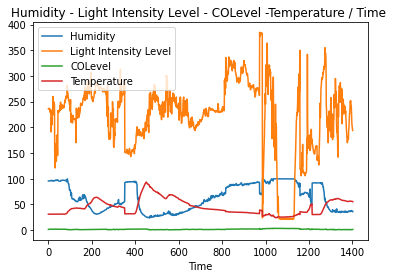

In [ ]:
import matplotlib.pyplot as plt
# line 1 points

# plotting the line 1 points 
plt.plot(Time, Humidity, label = "Humidity")
# line 2 points

# plotting the line 2 points 
plt.plot(Time, LightIntensityLevel, label = "Light Intensity Level")
# line 3 points

# plotting the line 2 points 
plt.plot(Time, COLevel, label = "COLevel")

# plotting the line 2 points 
plt.plot(Time, Temperature, label = "Temperature")

plt.xlabel('Time')
# Set the y axis label of the current axis.
#plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Humidity - Light Intensity Level - COLevel -Temperature / Time ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

# Finding the correlation

In [ ]:
#find the correlation among the columns in the dataframe
data_df.corr(method ='kendall') 

,Humidity,Temperature,Light Intensity Level,CO Level
Humidity,1.000000,-0.881927,-0.138571,0.503297
Temperature,-0.881927,1.000000,0.142693,-0.525207
Light Intensity Level,-0.138571,0.142693,1.000000,-0.112829
CO Level,0.503297,-0.525207,-0.112829,1.000000


In [ ]:
data_df.describe()

,Humidity,Temperature,Light Intensity Level,CO Level
count,1403.000000,1403.000000,1403.000000,1403.000000
mean,64.311547,45.066714,222.985745,1.775075
std,26.001416,15.094236,70.253331,0.707571
min,23.800000,24.300000,21.000000,0.530000
25%,37.300000,32.500000,194.500000,1.250000
50%,62.100000,41.900000,234.000000,1.630000
75%,92.000000,56.200000,268.000000,2.090000
max,99.900000,93.400000,385.000000,3.590000


# Temperature / Time

In [ ]:
# plotting the line 2 points 
def drawPlot(variable, variableName,threshold):
    plt.plot(Time, variable, label = variableName)
    plt.xlabel('Time')
    plt.ylabel(variableName)
    title = variableName +' / Time '
    plt.title(title)
    plt.axhline(y=threshold,color='r')
    plt.legend()
    plt.show()


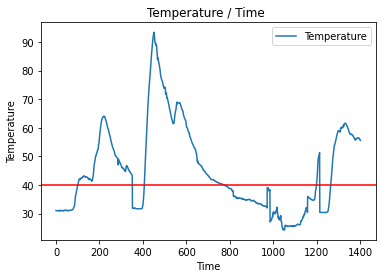

In [ ]:
drawPlot(Temperature,'Temperature',40)

# Light Intensity Level / Time


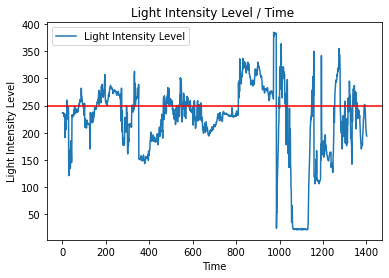

In [ ]:
drawPlot(LightIntensityLevel,'Light Intensity Level',250)

# CO Level / Time
The resistance of sensor at current CO concentration and the resistance of sensor at 1000ppm LPG in clean air

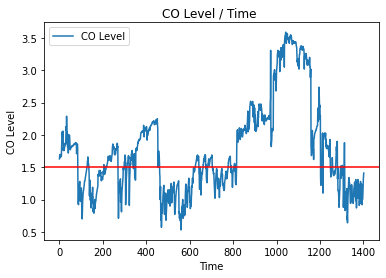

In [ ]:
drawPlot(COLevel,'CO Level',1.5)

# Humidity/ Time

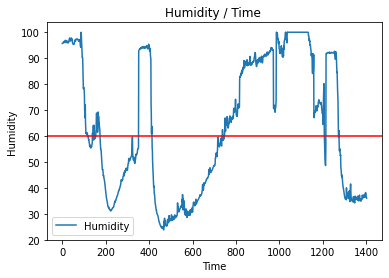

In [ ]:
drawPlot(Humidity,'Humidity',60)

# KMeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++')

In [ ]:
data_df.head()

,Humidity,Temperature,Light Intensity Level,CO Level
0,95.6,31.1,236.0,1.63
1,95.6,31.1,236.0,1.67
2,95.6,31.0,237.0,1.67
3,95.7,31.0,237.0,1.70
4,95.8,31.0,236.0,1.69


In [ ]:
#cols = list(data_df.columns)
#cols.remove('Time')
#input_df = data_df[cols]
input_df = data_df

In [ ]:
input_df.head()

,Humidity,Temperature,Light Intensity Level,CO Level
0,95.6,31.1,236.0,1.63
1,95.6,31.1,236.0,1.67
2,95.6,31.0,237.0,1.67
3,95.7,31.0,237.0,1.70
4,95.8,31.0,236.0,1.69


In [ ]:
kmeans.fit(input_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# inertia on the fitted data -- evaluate how well the formed clusters are
kmeans.inertia_

3675661.759603824

In [ ]:
pred = kmeans.predict(input_df)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
output_df = pd.DataFrame(input_df)
output_df.head()

,Humidity,Temperature,Light Intensity Level,CO Level
0,95.6,31.1,236.0,1.63
1,95.6,31.1,236.0,1.67
2,95.6,31.0,237.0,1.67
3,95.7,31.0,237.0,1.70
4,95.8,31.0,236.0,1.69


def assignClusterLable(pred_array):
    #labeled_df = pd.DataFrame(output_df)
    for i in range(len(pred)):
        if((pred_array[i]==0) & (float(pred_array[i]) > 40.0)):
            pred_array[i] = 1  
        if((pred_array[i]==1) & (float(pred_array[i]) <= 40.0)):
            pred_array[i] = 0
    labeled_df['cluster'] = pred_array
    return labeled_df
    

labeled_df = checkTempnew(pred)
labeled_df.head()

#the value count of points in each of the above-formed clusters
output_df = pd.DataFrame(input_df)
output_df['cluster'] = pred
output_df['cluster'].value_counts()
output_df.head()

def checkTemp(data_frame):
    for i in range(len(data_frame)):
        x = output_df['cluster'][i]
        if((output_df['cluster'][i]==0) & (float(output_df['Temperature'][i]) > 40.0)):
            x = 1  
        if((output_df['cluster'][i]==1) & (float(output_df['Temperature'][i]) <= 40.0)):
            x = 0
        data_frame['cluster_label'][i] = x

In [ ]:
pred[1200]

1

In [ ]:
def assignClusterLable(k_pred,data_frame):
    data_frame['cluster_ID'] = k_pred
    pred_array = []
    for i in range(len(data_frame)):
        if (data_frame['cluster_ID'][i] == 0) & (float(data_frame['Temperature'][i]) > 40.0):
            pred_array.append(1)
        elif (data_frame['cluster_ID'][i] == 1) & (float(data_frame['Temperature'][i]) <= 40.0):
            pred_array.append(0) 
        else:
            pred_array.append(data_frame['cluster_ID'][i])
    data_frame['cluster_label'] = pred_array

In [ ]:
proccessedOutput_df = output_df

In [ ]:
assignClusterLable(pred,proccessedOutput_df)

In [ ]:
proccessedOutput_df.head()

,Humidity,Temperature,Light Intensity Level,CO Level,cluster_ID,cluster_label
0,95.6,31.1,236.0,1.63,0,0
1,95.6,31.1,236.0,1.67,0,0
2,95.6,31.0,237.0,1.67,0,0
3,95.7,31.0,237.0,1.70,0,0
4,95.8,31.0,236.0,1.69,0,0


In [ ]:
from sklearn.decomposition import PCA
import pylab as pl

In [ ]:
pca = PCA(n_components=2).fit(proccessedOutput_df)

In [ ]:
pca_2d = pca.transform(proccessedOutput_df)

In [ ]:
pl.figure('Reference Plot')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

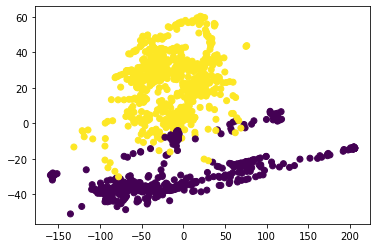

In [ ]:
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=proccessedOutput_df['cluster_label'])

In [ ]:
#proccessedOutput_df.to_csv("D:/labeled_fire_df_new.csv", encoding='utf-8', index=False)

# Analysis

## Multiple Linear Regression

In [ ]:
import sklearn
from sklearn import linear_model

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
cols = list(proccessedOutput_df.columns)
cols.remove('cluster_label')
cols.remove('cluster_ID')
input_df = proccessedOutput_df[cols]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection

In [ ]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(input_df, proccessedOutput_df['cluster_label'], test_size=0.20, random_state=1)

In [ ]:
reg_model =linear_model.LinearRegression()

In [ ]:
reg_model=reg_model.fit(train_x,train_y)

In [ ]:
print("Slope:", reg_model.coef_[0])

Slope: -0.021170462053575555


* The slope indicates the steepness of a line and the intercept indicates the location where it intersects an axis. 
* The slope and the intercept define the linear relationship between two variables, and can be used to estimate an average rate of change.

In [ ]:
print("Intercept:",reg_model.intercept_)

Intercept: 2.58055439797582


In [ ]:
print('Coefficients: \n', reg_model.coef_)

Coefficients: 
 [-0.02117046 -0.00970434 -0.00040232 -0.08110342]


In [ ]:
y_pred_train=reg_model.predict(train_x)
y_pred_test=reg_model.predict(test_x)

In [ ]:
dfccc = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred_test})
dfccc

,Actual,Predicted
680,1,0.965626
1375,1,1.117659
1246,0,0.128119
1104,0,-0.038530
194,1,0.936866
...,...,...
891,0,0.038901
766,1,0.621327
239,1,1.047298
1105,0,-0.056532


### Computing regression accuracy

In [ ]:
import sklearn.metrics as sm

In [ ]:
print("Mean absolute error =", round(sm.mean_absolute_error(test_y, y_pred_test), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(test_y, y_pred_test), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(test_y, y_pred_test), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(test_y, y_pred_test), 2)) 
print("R2 score =", round(sm.r2_score(test_y, y_pred_test), 2))

Mean absolute error = 0.15
Mean squared error = 0.05
Median absolute error = 0.08
Explain variance score = 0.81
R2 score = 0.81


An R2 score near 1 means that the model is able to predict the data very well. Keeping track of every single metric can get tedious, so we pick one or two metrics to evaluate our model. A good practice is to make sure that the mean squared error is low and the explained variance score is high.

#Prediction

In [ ]:
uploaded=files.upload()

Saving datasetsample.csv to datasetsample.csv


In [ ]:
#Read the csv file into a Pandas dataframe
#sample_df = pd.read_csv('D:/datasetsample.csv',encoding = "ISO-8859-1")
sample_df = pd.read_csv(io.StringIO(uploaded['datasetsample.csv'].decode('ISO-8859-1')))
sample_df.head()

,Humidity,Temperature,Light Intensity Level,CO Level,Area
0,98.7,33.3,270,0.94,1
1,95.6,31.1,236,1.67,2
2,95.6,31.0,237,1.67,3
3,25.3,78.3,267,1.10,4
4,95.8,31.0,236,1.69,1


In [ ]:
from statistics import *

In [ ]:
def firePredictionArea(data_frame):
    df_columns = ['Humidity', 'Temperature', 'Light Intensity Level', 'CO Level']
    areas = np.unique(np.array(sample_df['Area']))
    
    for area in areas:
        input_sample_df = pd.DataFrame(columns=df_columns)
        idx = 0
        for i, row in data_frame.iterrows():
            if data_frame['Area'][i] == area:
                input_sample_df.loc[idx] = row[['Humidity', 'Temperature', 'Light Intensity Level', 'CO Level']].values.tolist()
                idx += 1
                
        area_pred=reg_model.predict(input_sample_df)
        if round(mean(area_pred), 1) >= 0.5:
            print('Fire on Area - ',area)

In [ ]:
firePredictionArea(sample_df)

Fire on Area -  4


This ML Analysis is to Predict Fire as Area wise. 